In [2]:
#Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn import tree

In [3]:
#Loading dataset
df = pd.read_csv("C:\\Users\\SAYAN DAS\\OneDrive\\Desktop\\SkillCraft\\T3\\bank-additional-full.csv", sep=';')

In [4]:
#Encoding categorial variable using label encoder
le = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])


In [5]:
#Spliting dataset into feature and target
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
#Training Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [12]:
#Prediction of test data
y_pred = clf.predict(X_test)
#Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8892935178441369
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     10968
           1       0.51      0.51      0.51      1389

    accuracy                           0.89     12357
   macro avg       0.72      0.73      0.72     12357
weighted avg       0.89      0.89      0.89     12357



Why .88% of accuracy Makes Sense:
1.The bank marketing dataset is slightly imbalanced — most people did not subscribe to the product (y = "no").

2.A basic decision tree can easily achieve 85–90% accuracy just by learning dominant patterns (like rejecting most customers).

3.The classifier is likely predicting the majority class well but may be missing on the minority class (customers who said 
  "yes").

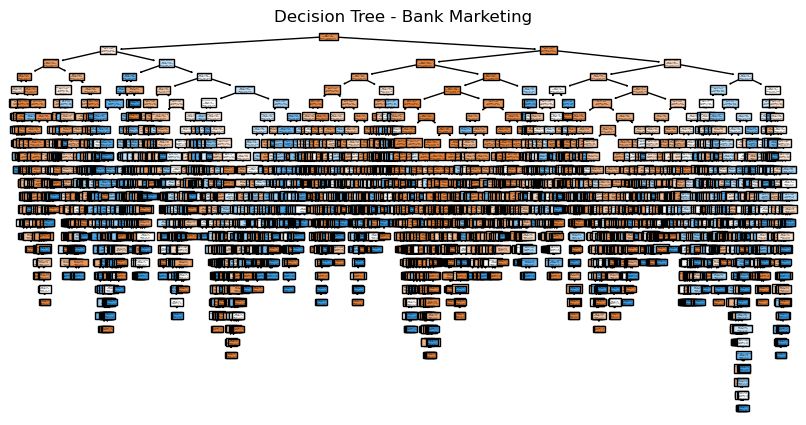

In [10]:
#Visualizing the decision tree (The Decision tree is large because of the size of the dataset)
plt.figure(figsize=(10,5))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.title("Decision Tree of Bank Marketing")
plt.show()

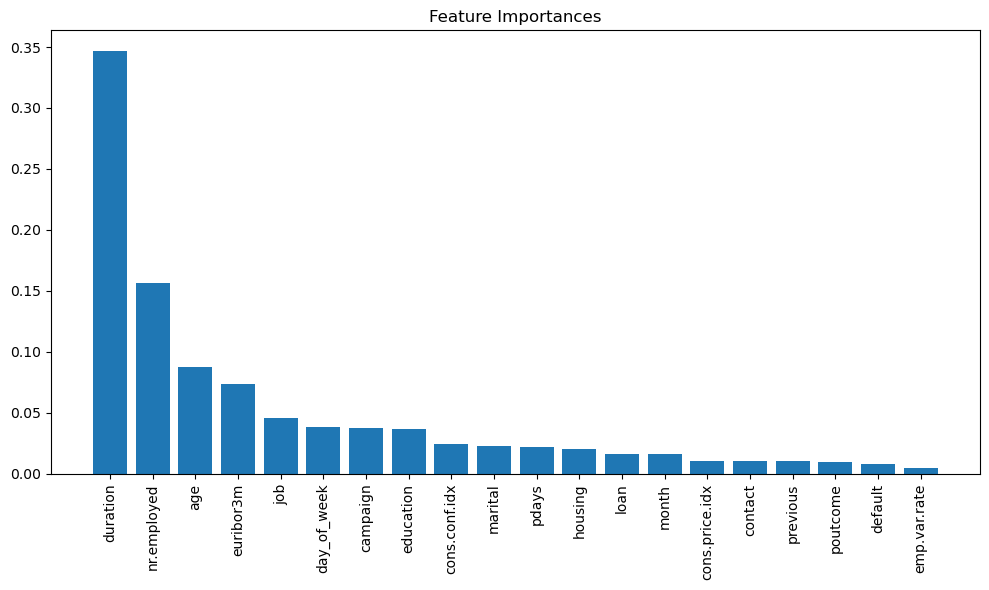

In [11]:
import numpy as np

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()